Importing all the modules for midterm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import spatial
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import neighbors, datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)
%matplotlib inline
adult = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/adult.data.simplified.csv")

Q2 - Subsetting the data

In [ ]:
adult_new = adult[adult['nativecountry']=='France']
adult_new.shape

(29, 12)

Q3 - dropping the workclass

In [ ]:
adult_new = adult_new.drop(['workclass'],axis=1)
print(adult_new.shape)
adult_new.head()

(29, 11)


,age,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD
503,58,Some-college,10,Divorced,Other-service,Unmarried,White,Female,42,France,41230
3666,51,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,France,118775
4635,28,Assoc-acdm,12,Never-married,Prof-specialty,Own-child,White,Male,40,France,44088
7982,55,HS-grad,9,Divorced,Priv-house-serv,Not-in-family,White,Female,40,France,25348
9743,33,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Male,55,France,36541


Q4 - Applying multiple Regression

In [ ]:
X = adult_new[['age','hoursperweek', 'educationyears']].values
y = adult_new['incomeUSD'].values

X = np.append(arr = np.ones((29, 1)).astype(int), values = X, axis = 1) # We are building our numpy array

X_opt = X[:, [0, 1, 2, 3]] # Now we combine all 6 input variables into our first iteration
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit() # Now we set up our regressor function with OLS again as before.
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1.517
Date:                Wed, 11 Oct 2023   Prob (F-statistic):              0.234
Time:                        04:18:51   Log-Likelihood:                -354.75
No. Observations:                  29   AIC:                             717.5
Df Residuals:                      25   BIC:                             723.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6704.3355   7.51e+04      0.089      0.9

Q5 - Correlation

In [ ]:
adult_new.corr()

,age,educationyears,hoursperweek,incomeUSD
age,1.000000,-0.278238,0.077412,0.141649
educationyears,-0.278238,1.000000,0.545895,0.136711
hoursperweek,0.077412,0.545895,1.000000,0.373710
incomeUSD,0.141649,0.136711,0.373710,1.000000


Q9 - Splitting the train and test data set

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(adult, train_size=25000)

train.shape

(25000, 12)

Q8 - Finding the optimal K values

The optimal number of neighbors is 8


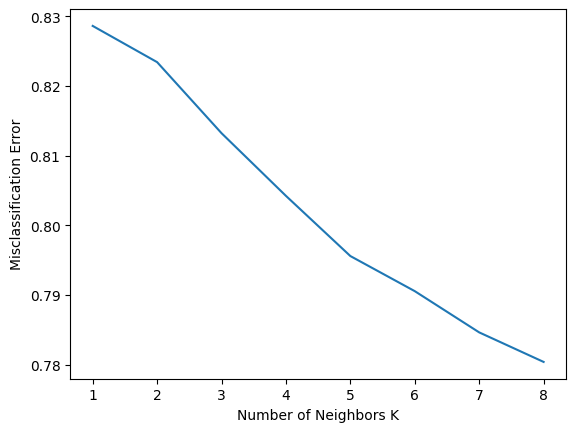

In [ ]:
x=train[['educationyears','hoursperweek','age']]
y=train['occupation']

# To determine how to pick k, we are first creating a list of potential k values
klist = list(range(1,9,1))

# Then we create an empty list that will hold cross-validation scores
cv_scores = []

for k in klist:
    model10 = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model10, x, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Changing to misclassification error
errors = 1- np.array(cv_scores)

optimal_k = klist[np.argmin(errors)]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(klist, errors)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
X_train = train[['educationyears','hoursperweek','age']]
X_test = test[['educationyears','hoursperweek','age']]
y_train = train['occupation']
y_test = test['occupation']

Q10 - Applying KNN model with k as 3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors = 3)
model1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Q13 - Finding the accuracy

In [ ]:
y_pred = model1.predict(X_test)
# Accuracy score
print("Test set score: {:.2f}".format(model1.score(X_test, y_test)))

Test set score: 0.19


0.1912445443724375

Q12 - building Confusion matrix

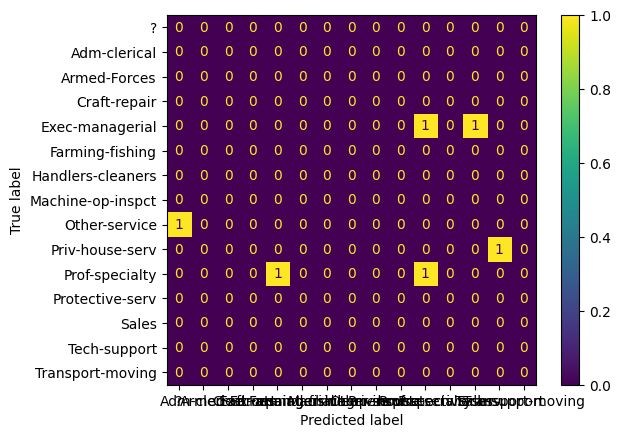

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model1.classes_)
cm_display = ConfusionMatrixDisplay(cm, display_labels=model1.classes_).plot()

Q14 - Q15 Split the train and test dataset

In [ ]:
X = adult_new [['educationyears','hoursperweek','age']]
y = adult_new ['occupation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (23, 3)
y_train shape: (23,)
X_test shape: (6, 3)
y_test shape: (6,)


Q16 - # Assign ins_naivebayes to the function.

In [ ]:
ins_naivebayes = GaussianNB()

In [ ]:
naive_bayes_model = ins_naivebayes.fit(X_train, y_train)

ins_predictions = ins_naivebayes.predict(X_test)
print(classification_report(y_test, ins_predictions))

                 precision    recall  f1-score   support

              ?       0.00      0.00      0.00         0
Exec-managerial       0.50      0.50      0.50         2
  Other-service       0.00      0.00      0.00         1
Priv-house-serv       0.00      0.00      0.00         1
 Prof-specialty       0.00      0.00      0.00         2
          Sales       0.00      0.00      0.00         0
   Tech-support       0.00      0.00      0.00         0

       accuracy                           0.17         6
      macro avg       0.07      0.07      0.07         6
   weighted avg       0.17      0.17      0.17         6



Q20 - Applying Random Forest with 10 trees

In [ ]:
rf =RandomForestClassifier(criterion='entropy')
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

              ?       0.00      0.00      0.00         0
Exec-managerial       0.00      0.00      0.00         2
  Other-service       0.00      0.00      0.00         1
Priv-house-serv       0.00      0.00      0.00         1
 Prof-specialty       0.50      0.50      0.50         2
          Sales       0.00      0.00      0.00         0
   Tech-support       0.00      0.00      0.00         0

       accuracy                           0.17         6
      macro avg       0.07      0.07      0.07         6
   weighted avg       0.17      0.17      0.17         6



Q21 - Applying Random Forest with 100 trees

In [ ]:
rf100 =RandomForestClassifier(criterion='entropy')
rf100.fit(X_train,y_train)
y_pred100 = rf100.predict(X_test)
cm = confusion_matrix(y_test, y_pred100, labels=rf100.classes_)
print(classification_report(y_test,y_pred100))

                 precision    recall  f1-score   support

              ?       0.00      0.00      0.00         0
Exec-managerial       0.50      0.50      0.50         2
  Other-service       0.00      0.00      0.00         1
Priv-house-serv       0.00      0.00      0.00         1
 Prof-specialty       0.50      0.50      0.50         2
   Tech-support       0.00      0.00      0.00         0

       accuracy                           0.33         6
      macro avg       0.17      0.17      0.17         6
   weighted avg       0.33      0.33      0.33         6

